In [68]:
import pandas as pd
import re


In [69]:
# Cargar dataset combinado limpio
combined_clean_path = "/content/fake_news_combined_clean.csv"
df = pd.read_csv(combined_clean_path)

# Funciones para extracción de features manuales
def count_uppercase_words(text):
    return sum(1 for word in str(text).split() if word.isupper())

def count_exclamations(text):
    return str(text).count("!")

def count_questions(text):
    return str(text).count("?")

def count_quotes(text):
    return str(text).count('"') + str(text).count("“") + str(text).count("”") + str(text).count("'")

def count_numbers(text):
    return len(re.findall(r'\d+', str(text)))

def has_percentage(text):
    return int(bool(re.search(r'\d+%', str(text))))

def has_money_sign(text):
    return int(bool(re.search(r'\$\d+', str(text))))

def has_alert_words(text):
    alert_words = ['urgente', 'alerta', 'última hora', 'impactante', 'increíble', 'atención']
    text = str(text).lower()
    return int(any(word in text for word in alert_words))

# Aplicar las funciones
df['num_mayusculas'] = df['content'].apply(count_uppercase_words)
df['num_exclamaciones'] = df['content'].apply(count_exclamations)
df['num_preguntas'] = df['content'].apply(count_questions)
df['num_comillas'] = df['content'].apply(count_quotes)
df['num_cifras'] = df['content'].apply(count_numbers)
df['tiene_porcentaje'] = df['content'].apply(has_percentage)
df['tiene_dinero'] = df['content'].apply(has_money_sign)
df['tiene_alerta'] = df['content'].apply(has_alert_words)


In [70]:
df

,label,content,title,source,split,dataset,num_mayusculas,num_exclamaciones,num_preguntas,num_comillas,num_cifras,tiene_porcentaje,tiene_dinero,tiene_alerta
0,Falsa,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...","RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",El Ruinaversal,train,posadas,22,0,0,22,0,0,0,0
1,Falsa,"La palabra ""haiga"", aceptada por la RAE La Rea...","La palabra ""haiga"", aceptada por la RAE",Hay noticia,train,posadas,5,0,0,16,0,0,0,0
2,Falsa,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,El Ruinaversal,train,posadas,18,0,2,11,0,0,0,0
3,Verdadera,UNAM capacitará a maestros para aprobar prueba...,UNAM capacitará a maestros para aprobar prueba...,EL UNIVERSAL,train,posadas,5,0,0,0,0,0,0,0
4,Falsa,Alerta: pretenden aprobar libros escolares con...,pretenden aprobar libros escolares con conteni...,Lamula,train,posadas,41,0,0,8,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,Verdadera,Source:El Periodico\n\n Prediction:True\n\n Co...,Ayuso niega la corrupción y reta a Casado a q...,El Periodico,NaN,omdena,2,0,0,5,0,0,0,0
4345,Verdadera,Source:proceso\n\n Prediction:True\n\n Content...,NaN,proceso,NaN,omdena,0,0,0,2,0,0,0,0
4346,Falsa,Source:El Mundo\n\n Prediction:Fake\n\n Conten...,Durán: “cueste lo que cueste” se debe ampliar...,El Mundo,NaN,omdena,0,0,0,10,1,0,0,0
4347,Verdadera,Source:El Mundo\n\n Prediction:True\n\n Conten...,"Recomiendan subir el bono de policías, soldad...",El Mundo,NaN,omdena,4,0,0,6,7,0,1,0


In [71]:
# Promedio por clase
df.groupby('label')[
    ['num_mayusculas', 'num_exclamaciones', 'num_preguntas', 'num_comillas',
     'num_cifras', 'tiene_porcentaje', 'tiene_dinero', 'tiene_alerta']
].mean().round(2)


,num_mayusculas,num_exclamaciones,num_preguntas,num_comillas,num_cifras,tiene_porcentaje,tiene_dinero,tiene_alerta
label,,,,,,,,
Falsa,3.89,0.10,0.21,4.08,2.53,0.03,0.03,0.07
Verdadera,4.95,0.04,0.27,5.53,4.80,0.05,0.06,0.07


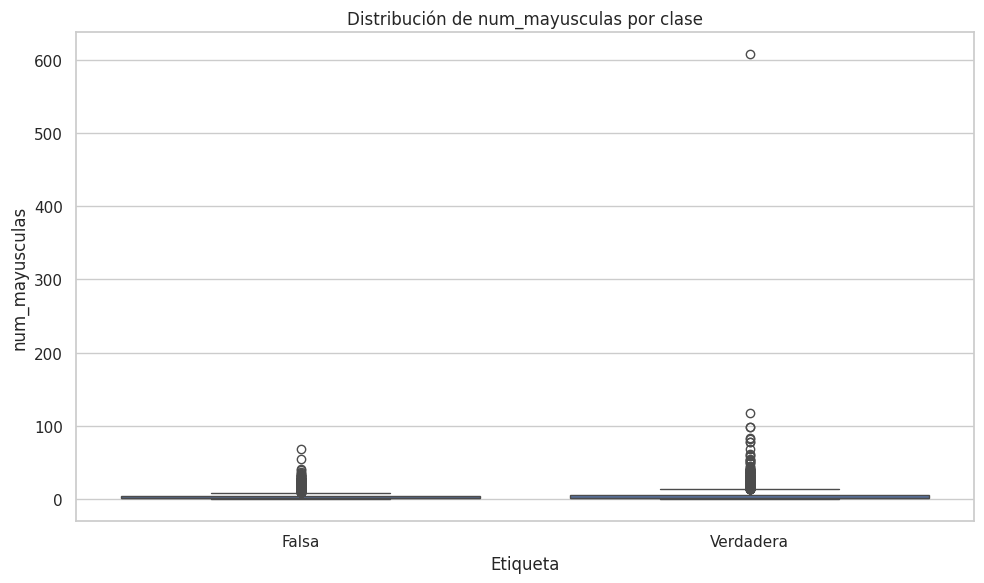

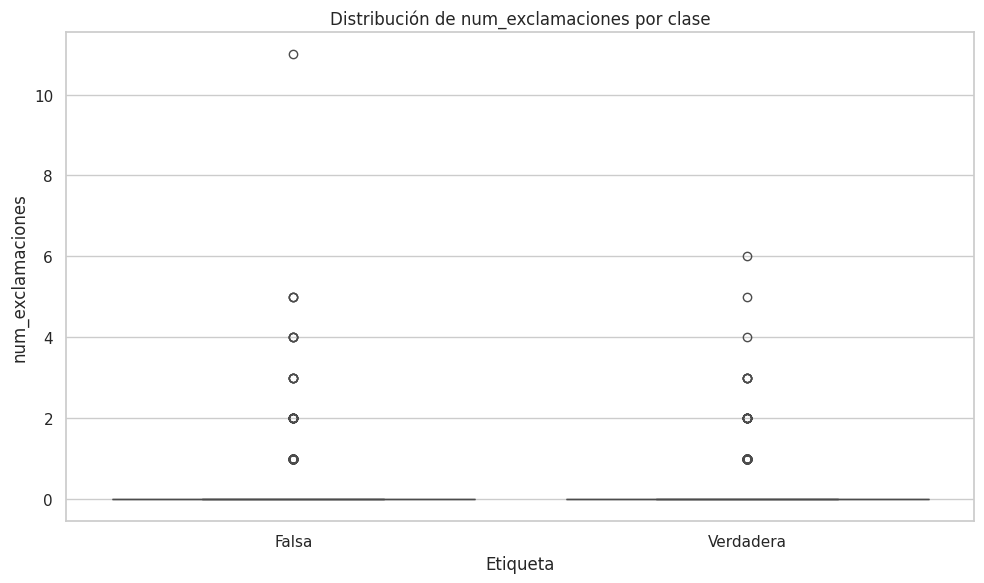

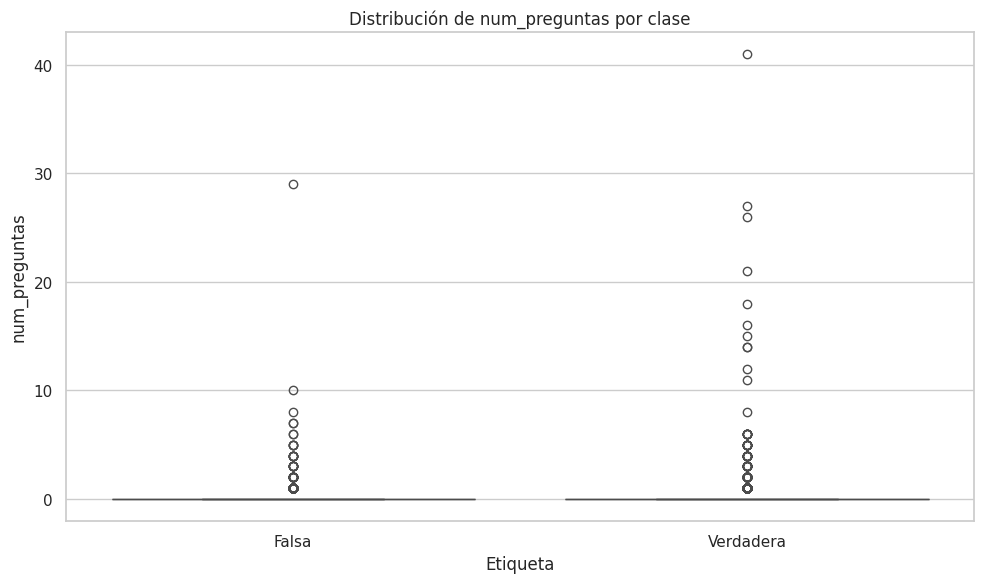

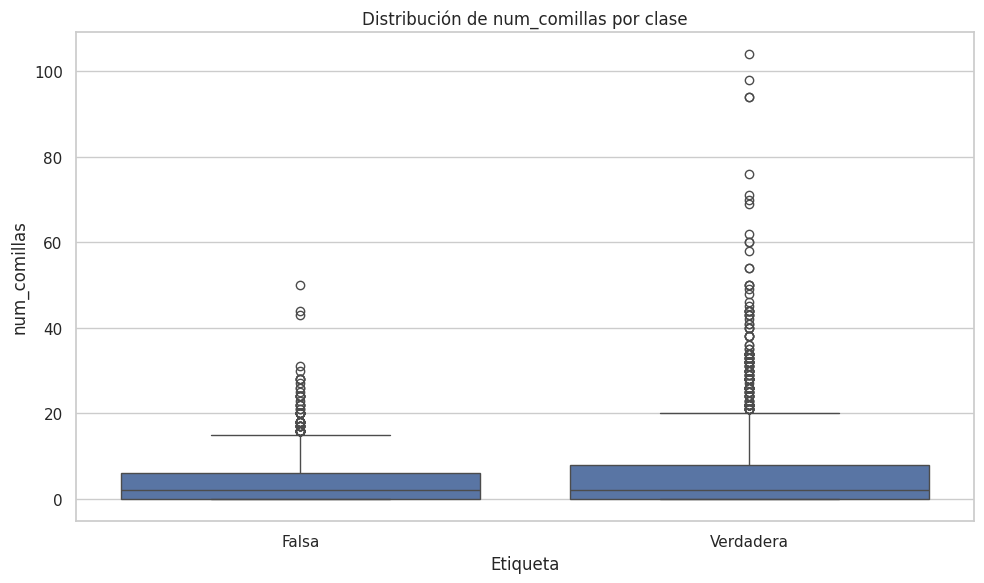

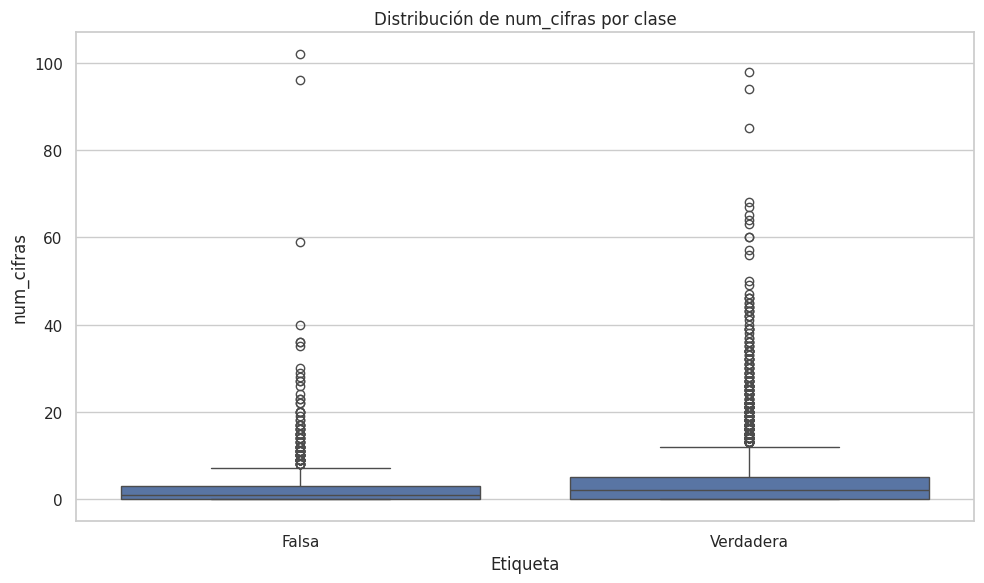

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Variables a visualizar
features_to_plot = [
    'num_mayusculas', 'num_exclamaciones', 'num_preguntas',
    'num_comillas', 'num_cifras'
]

# Crear boxplots por cada feature
for feature in features_to_plot:
    plt.figure()
    sns.boxplot(data=df, x='label', y=feature)
    plt.title(f'Distribución de {feature} por clase')
    plt.xlabel('Etiqueta')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


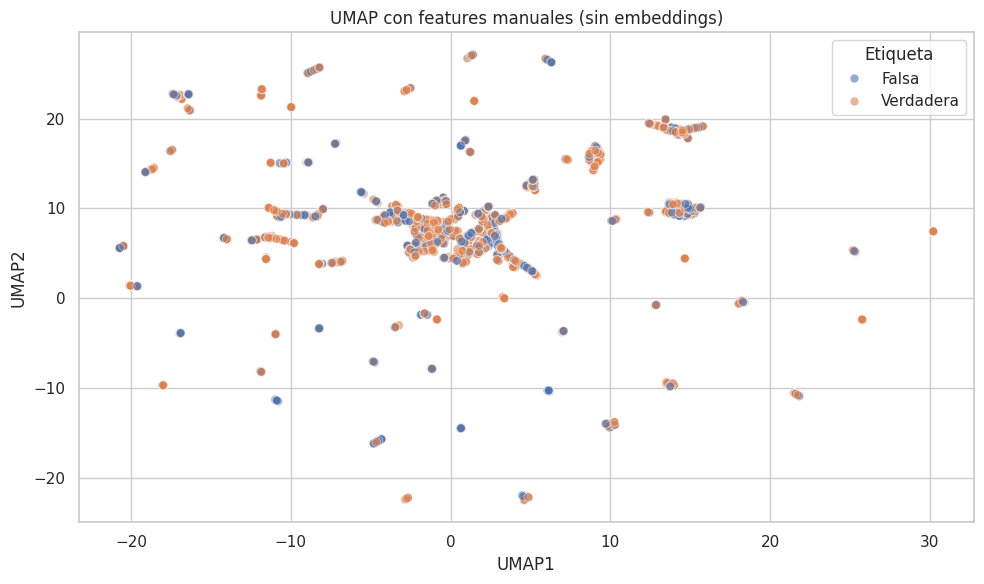

In [73]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

# Seleccionar solo las columnas de features
feature_cols = [
    'num_mayusculas', 'num_exclamaciones', 'num_preguntas',
    'num_comillas', 'num_cifras', 'tiene_porcentaje',
    'tiene_dinero', 'tiene_alerta'
]

X = df[feature_cols]
y = df['label']

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar UMAP
umap_model = umap.UMAP(random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Crear DataFrame con resultados para visualización
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['label'] = y.values

# Visualizar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='label', alpha=0.6, s=40)
plt.title("UMAP con features manuales (sin embeddings)")
plt.legend(title='Etiqueta')
plt.tight_layout()
plt.show()

In [74]:
!pip install transformers torch


In [75]:
# === EXTRACCIÓN DE EMBEDDINGS BETO ===
from transformers import AutoTokenizer, AutoModel
import torch
from tqdm import tqdm
import numpy as np

# Preparar modelo y tokenizer
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
model = AutoModel.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased").eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

def get_cls_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [76]:
# Desactivar barra de progreso
tqdm.disable = True
# Extraer embeddings con tqdm
embeddings = []
for text in tqdm(df['content'].fillna("").tolist(), desc="Extracting BETO embeddings"):
    emb = get_cls_embedding(text)
    embeddings.append(emb)

# Convertir a DataFrame
embeddings_df = pd.DataFrame(embeddings)
embeddings_df.columns = [f"beto_{i}" for i in range(embeddings_df.shape[1])]


Extracting BETO embeddings: 100%|██████████| 4349/4349 [01:38<00:00, 44.27it/s]


In [77]:
# Seleccionar features manuales
features = df[[
    'num_mayusculas', 'num_exclamaciones', 'num_preguntas',
    'num_comillas', 'num_cifras', 'tiene_porcentaje',
    'tiene_dinero', 'tiene_alerta'
]]

df_final = pd.concat([features.reset_index(drop=True), embeddings_df], axis=1)
df_final['label'] = df['label']


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Separar features y target
X_final = df_final.drop(columns=['label'])
y = df_final['label']
y_encoded = y.map({'Falsa': 0, 'Verdadera': 1})

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Entrenar modelo
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)

print("🔍 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=['Falsa', 'Verdadera']))
print("\n🧩 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


🔍 Reporte de clasificación:

              precision    recall  f1-score   support

       Falsa       0.67      0.42      0.51       300
   Verdadera       0.74      0.89      0.81       570

    accuracy                           0.73       870
   macro avg       0.71      0.65      0.66       870
weighted avg       0.72      0.73      0.71       870


🧩 Matriz de confusión:
[[125 175]
 [ 61 509]]


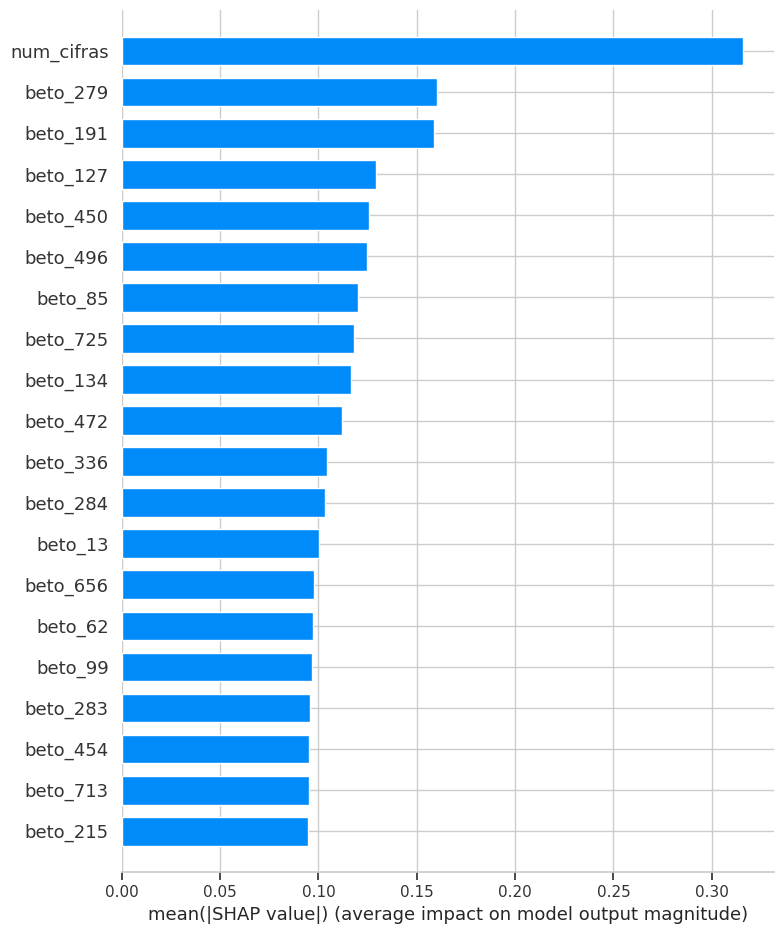

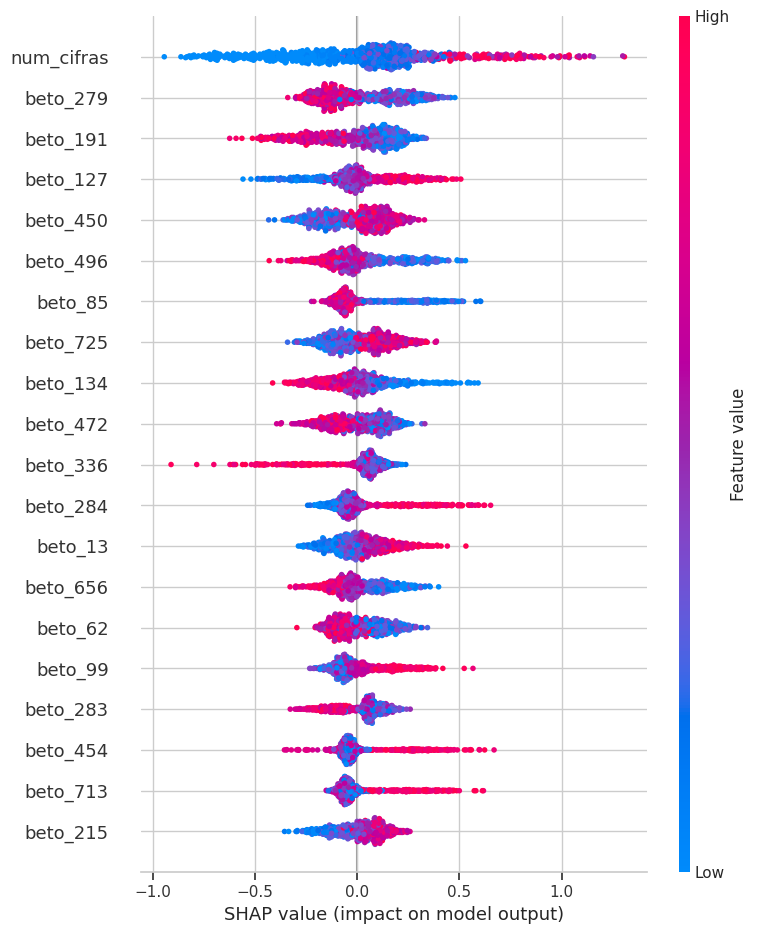

In [80]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


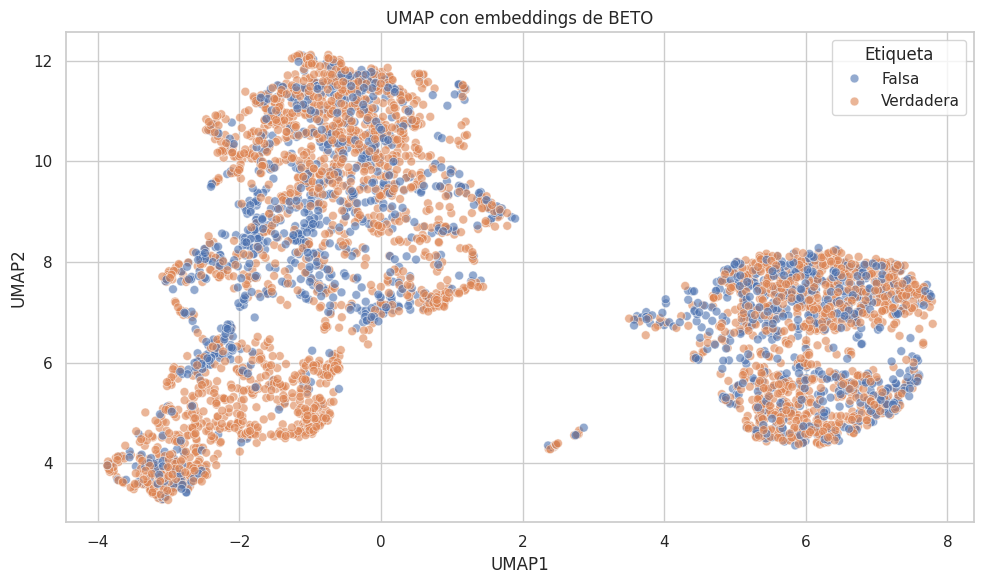

In [81]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo embeddings
embedding_cols = [col for col in X_final.columns if col.startswith('beto_')]
X_embeddings = X_final[embedding_cols]

# Escalar y reducir
X_embeddings_scaled = StandardScaler().fit_transform(X_embeddings)
X_umap = umap.UMAP(random_state=42).fit_transform(X_embeddings_scaled)

# Visualizar
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['label'] = y.values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='label', alpha=0.6, s=40)
plt.title("UMAP con embeddings de BETO")
plt.legend(title='Etiqueta')
plt.tight_layout()
plt.show()


In [82]:
import hdbscan

# Filtrar noticias falsas desde df_final
df_falsas = df_final[df_final['label'] == 'Falsa'].reset_index(drop=True)

# Escalar embeddings
embedding_cols = [col for col in df_falsas.columns if col.startswith("beto_")]
X_falsas_embeddings = df_falsas[embedding_cols]
X_scaled = StandardScaler().fit_transform(X_falsas_embeddings)

# HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, prediction_data=True)
cluster_labels = clusterer.fit_predict(X_scaled)
df_falsas['cluster'] = cluster_labels


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


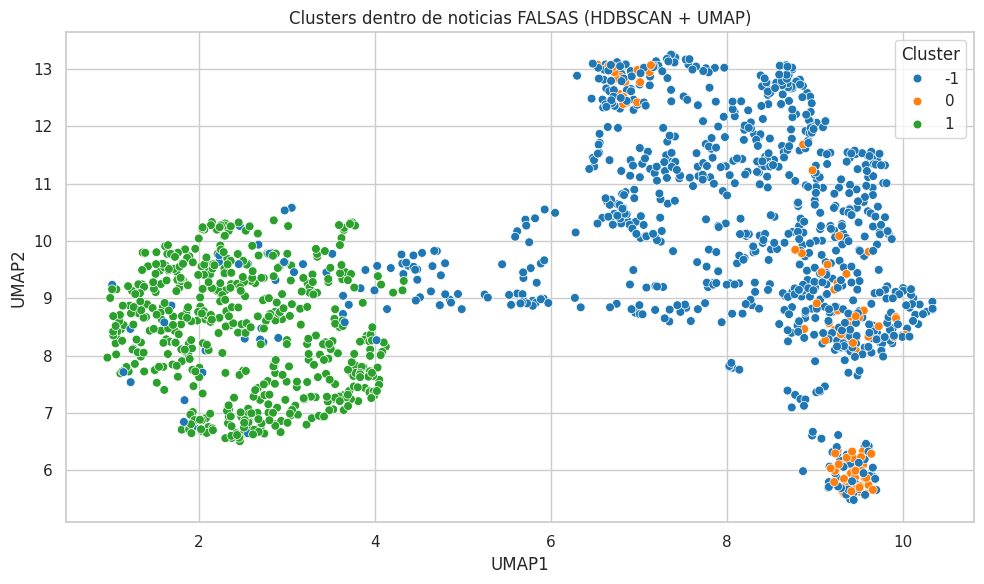

In [83]:
# UMAP de embeddings
X_umap_falsas = umap.UMAP(random_state=42).fit_transform(X_scaled)
df_falsas['UMAP1'] = X_umap_falsas[:, 0]
df_falsas['UMAP2'] = X_umap_falsas[:, 1]

# Graficar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_falsas, x='UMAP1', y='UMAP2', hue='cluster', palette='tab10', s=40)
plt.title("Clusters dentro de noticias FALSAS (HDBSCAN + UMAP)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [84]:
# Cargar el dataset original (con texto)
df_original = pd.read_csv("/content/fake_news_combined_clean.csv")

# Unir df_falsas (que contiene cluster) con df_original (que tiene texto)
df_falsas_con_texto = df_falsas.merge(
    df_original[['content', 'title']],  # o 'Headline' si lo cambiaste
    left_index=True,
    right_index=True,
    how='left'
)

# Ver ejemplos por cluster
for c in df_falsas_con_texto['cluster'].unique():
    print(f"\n🔹 Cluster {c} — ejemplo:")
    print(df_falsas_con_texto[df_falsas_con_texto['cluster'] == c]['content'].iloc[0][:700])



🔹 Cluster -1 — ejemplo:
RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONARIO DEL IDIOMA ESPAÑOL COMO DEFINICIÓN DE "MUJER PROBLEMÁTICA"
España.- El presidente de la Real Academia Española (RAE), Darío Villanueva, informó en conferencia de prensa que a partir del próximo mes se incluirá el término "Lady" como una nueva palabra en el diccionario del idioma español.
Darío señaló que "Lady" servirá para definir a una "mujer problemática" o a una "mujer que causa problemas", y mencionó que esta palabra será una de las pocas que también se utilizan en el idioma inglés pero que en castellano tiene un significado diferente:
"Son contadas las palabras del idioma inglés que se utilizan en el español pero que tienen otro signific

🔹 Cluster 0 — ejemplo:
*NUMBER* palabras que creíamos inaceptables y que la RAE (sorprendentemente) aprueba
La cuenta de Twitter de la Real Academia Española hierve de actividad. Sus respuestas a las consultas de los usuarios pocas veces dejan indiferente
"Consulta: cuál e

In [85]:
# Asignar etiquetas según el cluster
cluster_to_label = {
    -1: "muy_falsa",
    0: "alarma",
    1: "semi_falsa"
}

df_falsas_con_texto['subtipo'] = df_falsas_con_texto['cluster'].map(cluster_to_label)


In [86]:
# Tomar solo noticias verdaderas del df_final original
df_verdaderas = df_final[df_final['label'] == 'Verdadera'].copy()
df_verdaderas['subtipo'] = 'verdadera'

# Unir ambos datasets
df_multiclase = pd.concat([
    df_falsas_con_texto.drop(columns=['label']),  # usamos 'subtipo' en su lugar
    df_verdaderas.drop(columns=['label'])
]).reset_index(drop=True)


In [87]:
# Seleccionar solo columnas válidas para modelado
columnas_validas = [col for col in df_multiclase.columns
                    if col.startswith('beto_') or col in [
                        'num_mayusculas', 'num_exclamaciones', 'num_preguntas',
                        'num_comillas', 'num_cifras', 'tiene_porcentaje',
                        'tiene_dinero', 'tiene_alerta'
                    ]]

X = df_multiclase[columnas_validas]

In [91]:
print("Columnas de X:", X.columns.tolist())

Columnas de X: ['num_mayusculas', 'num_exclamaciones', 'num_preguntas', 'num_comillas', 'num_cifras', 'tiene_porcentaje', 'tiene_dinero', 'tiene_alerta', 'beto_0', 'beto_1', 'beto_2', 'beto_3', 'beto_4', 'beto_5', 'beto_6', 'beto_7', 'beto_8', 'beto_9', 'beto_10', 'beto_11', 'beto_12', 'beto_13', 'beto_14', 'beto_15', 'beto_16', 'beto_17', 'beto_18', 'beto_19', 'beto_20', 'beto_21', 'beto_22', 'beto_23', 'beto_24', 'beto_25', 'beto_26', 'beto_27', 'beto_28', 'beto_29', 'beto_30', 'beto_31', 'beto_32', 'beto_33', 'beto_34', 'beto_35', 'beto_36', 'beto_37', 'beto_38', 'beto_39', 'beto_40', 'beto_41', 'beto_42', 'beto_43', 'beto_44', 'beto_45', 'beto_46', 'beto_47', 'beto_48', 'beto_49', 'beto_50', 'beto_51', 'beto_52', 'beto_53', 'beto_54', 'beto_55', 'beto_56', 'beto_57', 'beto_58', 'beto_59', 'beto_60', 'beto_61', 'beto_62', 'beto_63', 'beto_64', 'beto_65', 'beto_66', 'beto_67', 'beto_68', 'beto_69', 'beto_70', 'beto_71', 'beto_72', 'beto_73', 'beto_74', 'beto_75', 'beto_76', 'beto_77'

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# 1. Eliminar columnas de texto que no sirven para el modelo
X = df_multiclase.drop(columns=['subtipo', 'content', 'title', 'cluster', 'UMAP1', 'UMAP2'], errors='ignore')

# 2. Etiquetas
y = df_multiclase['subtipo']

# 3. Codificar etiquetas a números
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

# 5. Entrenar modelo multiclase
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)

# 6. Predicciones
y_pred = model.predict(X_test)

# 7. Reporte de clasificación con etiquetas originales
print("🔍 Reporte de clasificación multiclase:\n")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))



🔍 Reporte de clasificación multiclase:

              precision    recall  f1-score   support

      alarma       0.67      0.11      0.18        19
   muy_falsa       0.74      0.36      0.49       174
  semi_falsa       0.63      0.34      0.44       108
   verdadera       0.73      0.92      0.81       569

    accuracy                           0.72       870
   macro avg       0.69      0.43      0.48       870
weighted avg       0.72      0.72      0.69       870



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 Reporte de clasificación multiclase:

              precision    recall  f1-score   support

      alarma       0.67      0.11      0.18        19
   muy_falsa       0.74      0.36      0.49       174
  semi_falsa       0.63      0.34      0.44       108
   verdadera       0.73      0.92      0.81       569

    accuracy                           0.72       870
   macro avg       0.69      0.43      0.48       870
weighted avg       0.72      0.72      0.69       870



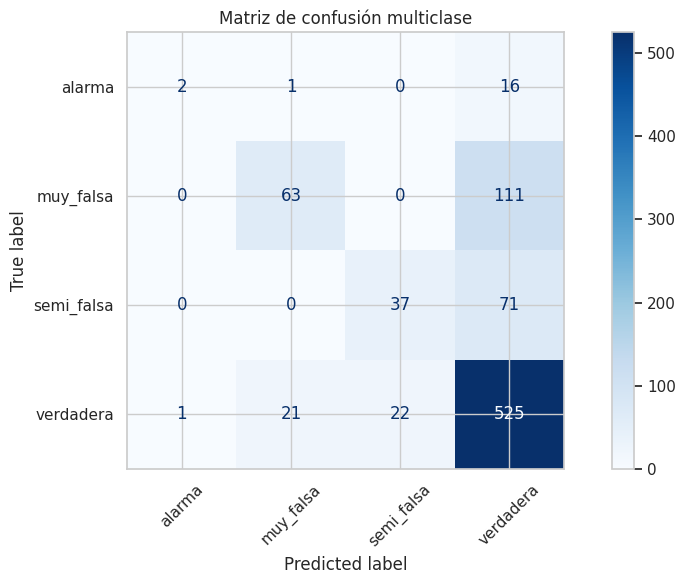

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 🔹 Filtrar columnas válidas (evitar fuga de información)
columnas_validas = [col for col in df_multiclase.columns
                    if col.startswith('beto_') or col in [
                        'num_mayusculas', 'num_exclamaciones', 'num_preguntas',
                        'num_comillas', 'num_cifras', 'tiene_porcentaje',
                        'tiene_dinero', 'tiene_alerta'
                    ]]

X = df_multiclase[columnas_validas]
y = df_multiclase['subtipo']

# 🔹 Codificar etiquetas
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 🔹 Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

# 🔹 Entrenar modelo con balance de clases
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    scale_pos_weight=None,
    random_state=42
)
model.fit(X_train, y_train)

# 🔹 Predicción
y_pred = model.predict(X_test)

# 🔹 Reporte
print("🔍 Reporte de clasificación multiclase:\n")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))

# 🔹 Matriz de confusión
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de confusión multiclase")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📉 Reporte con embeddings reducidos por PCA:

              precision    recall  f1-score   support

      alarma       0.50      0.05      0.10        19
   muy_falsa       0.65      0.38      0.48       174
  semi_falsa       0.46      0.28      0.35       108
   verdadera       0.71      0.88      0.79       569

    accuracy                           0.69       870
   macro avg       0.58      0.40      0.43       870
weighted avg       0.66      0.69      0.66       870



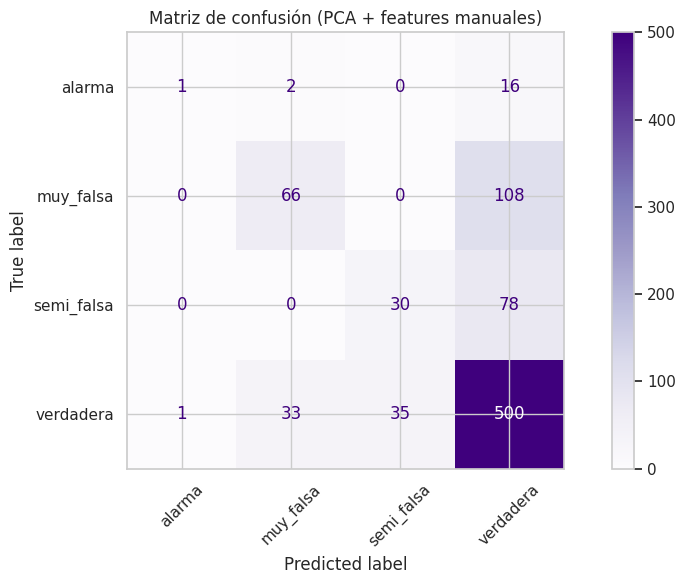

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 🔹 Separar embeddings y features manuales
embedding_cols = [col for col in X.columns if col.startswith("beto_")]
manual_cols = [col for col in X.columns if not col.startswith("beto_")]

# 🔹 Escalar embeddings antes de aplicar PCA
scaler = StandardScaler()
X_embeddings_scaled = scaler.fit_transform(X[embedding_cols])

# 🔹 Aplicar PCA para reducir dimensiones
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_embeddings_scaled)

# 🔹 Combinar PCA + features manuales
X_reduced = pd.concat([
    pd.DataFrame(X_pca, columns=[f'pca_{i}' for i in range(50)]),
    X[manual_cols].reset_index(drop=True)
], axis=1)

# 🔹 Repetir pipeline de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

model_pca = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
model_pca.fit(X_train, y_train)

y_pred_pca = model_pca.predict(X_test)

# 🔹 Reporte con PCA
print("📉 Reporte con embeddings reducidos por PCA:\n")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred_pca)))

# 🔹 Matriz de confusión con PCA
cm_pca = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred_pca), labels=le.classes_)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=le.classes_)
disp_pca.plot(cmap="Purples", xticks_rotation=45)
plt.title("Matriz de confusión (PCA + features manuales)")
plt.tight_layout()
plt.show()
